# This regression script models houses that were sold for under $1,000,000.

In [1]:
# Import libraries for data manipulation
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Import data from csv file
original_data = pd.read_csv('../source_data/housing_data_cleaned.csv')

df = original_data.copy()
df = df[df['category_code_description'] == 'Single Family']
df = df[df['sale_price'] < 1000000]
df['full_finished_basement'] = np.where(df['basements'] == 'A', 'Y', 'N')
df.head()

,id,basements,building_code_description,category_code_description,census_tract,central_air,depth,exempt_building,exempt_land,exterior_condition,...,total_area,total_livable_area,type_heater,unit,view_type,year_built,year_built_estimate,zip_code,zoning,full_finished_basement
0,1,D,ROW 3 STY MASONRY,Single Family,241,N,67.0,49200,0,4,...,938.00,1344,A,NaN,I,1895,Y,19144,RSA5,N
1,2,NaN,ROW 2 STY MASONRY,Single Family,201,NaN,70.0,0,0,4,...,1044.00,1190,NaN,NaN,I,1940,Y,19140,RM1,N
2,3,H,ROW B/GAR 2 STY MASONRY,Single Family,281,N,95.5,0,0,4,...,1686.53,1633,B,NaN,I,1940,Y,19141,RSA3,N
3,4,NaN,ROW 2 STY MASONRY,Single Family,293,NaN,112.5,0,0,4,...,2165.62,1320,B,NaN,I,1940,Y,19124,RSA5,N
4,5,NaN,ROW 2 STY MASONRY,Single Family,62,NaN,79.0,0,0,4,...,1264.00,960,NaN,NaN,I,1920,NaN,19142,RM1,N


In [3]:
print(len(df))

65194


In [4]:
# Analyze houses that are under $1,000,000
housing_regression_df = df[["full_finished_basement",
                            "central_air",
                            "number_of_bedrooms",
                            "number_of_bathrooms",
                            "total_livable_area",
                            "interior_condition",
                            "garage_spaces",
                            "year_built",
                            "sale_price",
                            "exempt_building",
                            "exempt_land",
                            "taxable_building",
                            "taxable_land"]]
housing_regression_df['age'] = 2021 - housing_regression_df['year_built']
housing_regression_df = housing_regression_df.dropna(subset = ['central_air','interior_condition'])
housing_regression_df['has_taxable_land'] = np.where(housing_regression_df['taxable_land'] != 0, 1, 0)
housing_regression_df['has_taxable_building'] = np.where(housing_regression_df['taxable_building'] != 0, 1, 0)
housing_regression_df['has_exempt_land'] = np.where(housing_regression_df['exempt_land'] != 0, 1, 0)
housing_regression_df['has_exempt_building'] = np.where(housing_regression_df['exempt_building'] != 0, 1, 0)


housing_regression_df = housing_regression_df.drop(columns=['year_built'], axis=1)
housing_regression_df = housing_regression_df.drop(columns=['exempt_land','exempt_building','taxable_land','taxable_building'], axis=1)

housing_regression_df.head()

/Users/anthonycarannante/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,full_finished_basement,central_air,number_of_bedrooms,number_of_bathrooms,total_livable_area,interior_condition,garage_spaces,sale_price,age,has_taxable_land,has_taxable_building,has_exempt_land,has_exempt_building
0,N,N,4,2,1344,4.0,0,90000,126,1,1,0,1
2,N,N,3,1,1633,4.0,1,154000,81,1,1,0,0
9,N,N,3,1,1120,4.0,0,145000,76,1,1,0,0
11,N,N,3,1,1080,4.0,0,75000,96,1,1,0,0
13,N,N,3,2,1680,4.0,0,422900,101,1,1,0,0


In [5]:
housing_regression_df = pd.get_dummies(housing_regression_df)
housing_regression_df = housing_regression_df.drop(columns=['central_air_N','full_finished_basement_N'])
housing_regression_df.head()

,number_of_bedrooms,number_of_bathrooms,total_livable_area,interior_condition,garage_spaces,sale_price,age,has_taxable_land,has_taxable_building,has_exempt_land,has_exempt_building,full_finished_basement_Y,central_air_Y
0,4,2,1344,4.0,0,90000,126,1,1,0,1,0,0
2,3,1,1633,4.0,1,154000,81,1,1,0,0,0,0
9,3,1,1120,4.0,0,145000,76,1,1,0,0,0,0
11,3,1,1080,4.0,0,75000,96,1,1,0,0,0,0
13,3,2,1680,4.0,0,422900,101,1,1,0,0,0,0


In [6]:
# Drop categorical data values that are not relevant to the model
X = housing_regression_df[['full_finished_basement_Y',
                           'central_air_Y',
                           'number_of_bedrooms',
                           'number_of_bathrooms',
                           'total_livable_area',
                           'interior_condition',
                           'garage_spaces',
                           'age',
                           'has_taxable_building',
                           'has_taxable_land',
                           'has_exempt_building',
                           'has_exempt_land']]
y = housing_regression_df['sale_price'].values.reshape(-1, 1)

print(X.shape)
print(y.shape)
print()
print(X.columns.tolist())

(44245, 12)
(44245, 1)

['full_finished_basement_Y', 'central_air_Y', 'number_of_bedrooms', 'number_of_bathrooms', 'total_livable_area', 'interior_condition', 'garage_spaces', 'age', 'has_taxable_building', 'has_taxable_land', 'has_exempt_building', 'has_exempt_land']


## Raw Data Model 

In [7]:
# Use train_test_split to create training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [8]:
# Create the model using LinearRegression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model

LinearRegression()

In [9]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.551408571380785
Testing Score: 0.5524132219980696


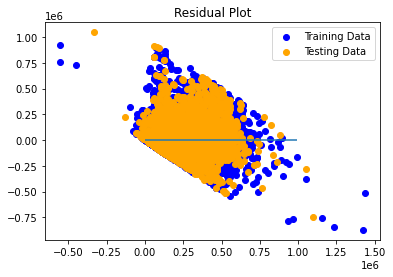

In [10]:
# Plot predicted values vs residual values
plt.scatter(model.predict(X_train), y_train - model.predict(X_train), c="blue", label="Training Data")
plt.scatter(model.predict(X_test), y_test - model.predict(X_test), c="orange", label="Testing Data")
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
plt.legend()
plt.title("Residual Plot")
plt.show()

## Standard Scaler Model 

In [11]:
# Create a StandardScaler model and fit it to the training data
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)
print(f"{X_scaler.scale_}, {y_scaler.scale_}")

[3.67657017e-01 4.98080291e-01 7.39717532e-01 6.06795898e-01
 4.76411875e+02 1.11507905e+00 5.38729786e-01 3.79720934e+01
 2.77054348e-01 8.61269419e-02 4.91838653e-01 1.02302579e-01], [161070.54389656]


In [12]:
# Transform the training and testing data using the X_scaler and y_scaler models
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [13]:
# Create a LinearRegression model and fit it to the scaled training data
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

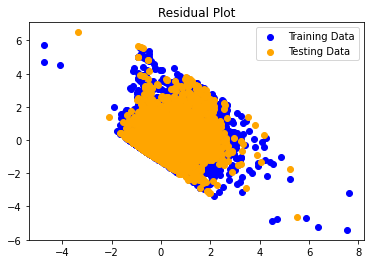

In [14]:
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), y_train_scaled - model.predict(X_train_scaled), c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), y_test_scaled - model.predict(X_test_scaled), c="orange", label="Testing Data")
plt.legend()
plt.title("Residual Plot")
plt.show()

In [15]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2
from sklearn.metrics import mean_squared_error

MSE_LR = mean_squared_error(y_test_scaled, predictions)
r2_LR = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {round(MSE_LR,3)}, R2: {round(r2_LR,3)}")

MSE: 0.438, R2: 0.552


## LASSO Model

In [16]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.01).fit(X_train_scaled, y_train_scaled)
predictions = lasso.predict(X_test_scaled)

MSE_lasso = mean_squared_error(y_test_scaled, predictions)
r2_lasso = lasso.score(X_test_scaled, y_test_scaled)

print(f"MSE: {round(MSE_lasso,3)}, R2: {round(r2_lasso,3)}")

MSE: 0.44, R2: 0.551


## Ridge Model

In [17]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)
predictions = ridge.predict(X_test_scaled)

MSE_ridge = mean_squared_error(y_test_scaled, predictions)
r2_ridge = ridge.score(X_test_scaled, y_test_scaled)

print(f"MSE: {round(MSE_ridge,3)}, R2: {round(r2_ridge,3)}")

MSE: 0.438, R2: 0.552


## ElasticNet Model

In [18]:
from sklearn.linear_model import ElasticNet

elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)
predictions = elasticnet.predict(X_test_scaled)

MSE_EL = mean_squared_error(y_test_scaled, predictions)
r2_EL = elasticnet.score(X_test_scaled, y_test_scaled)

print(f"MSE: {round(MSE_EL,3)}, R2: {round(r2_EL,3)}")

MSE: 0.439, R2: 0.552


### Model Scores 

In [19]:
# Display scores of all models tested
r2_results = [r2_LR, r2_lasso, r2_ridge, r2_EL]
# MSE_results = [MSE_LR, MSE_lasso, MSE_ridge, MSE_EL]
r2_indices = ['Linear Regression','LASSO','Ridge','ElasticNet']

results = pd.DataFrame({"R2 Score": r2_results}, index=[r2_indices]).sort_values('R2 Score', ascending=False)
results

,R2 Score
Linear Regression,0.552413
Ridge,0.552413
ElasticNet,0.551661
LASSO,0.551069


In [20]:
# Look at variables with the most impact on the models
correlated_variables = X.columns

weights = pd.DataFrame({'LR Weights': [round(x,3) for x in model.coef_[0]],
              'LASSO Weights': [round(x,3) for x in lasso.coef_],
              'Ridge Weights': [round(x,3) for x in ridge.coef_[0]],
              'ElasticNet Weights': [round(x,3) for x in elasticnet.coef_]}, 
              index=[correlated_variables])
weights

,LR Weights,LASSO Weights,Ridge Weights,ElasticNet Weights
full_finished_basement_Y,-0.016,-0.000,-0.016,-0.004
central_air_Y,0.229,0.222,0.229,0.223
number_of_bedrooms,-0.108,-0.090,-0.108,-0.097
number_of_bathrooms,0.131,0.123,0.131,0.126
total_livable_area,0.409,0.393,0.409,0.398
interior_condition,-0.193,-0.197,-0.193,-0.194
garage_spaces,-0.028,-0.016,-0.028,-0.022
age,0.014,0.000,0.014,0.000
has_taxable_building,-0.037,-0.018,-0.037,-0.024
has_taxable_land,0.016,0.011,0.016,0.014


# Final Model

In [21]:
final_model_r2 = pd.DataFrame({"R2 Score": r2_LR}, index=['Linear Regression']).sort_values('R2 Score', ascending=False)
final_model_coefficients = pd.DataFrame({'Weight (w)': model.coef_[0],
                                         'Scaler (s)': X_scaler.scale_,
                                         'w * x': model.coef_[0] * X_scaler.scale_}, index=[correlated_variables])
final_model_coefficients

,Weight (w),Scaler (s),w * x
full_finished_basement_Y,-0.015725,0.367657,-0.005782
central_air_Y,0.228988,0.498080,0.114054
number_of_bedrooms,-0.107610,0.739718,-0.079601
number_of_bathrooms,0.130584,0.606796,0.079238
total_livable_area,0.409244,476.411875,194.968839
interior_condition,-0.193487,1.115079,-0.215753
garage_spaces,-0.028135,0.538730,-0.015157
age,0.014218,37.972093,0.539899
has_taxable_building,-0.036705,0.277054,-0.010169
has_taxable_land,0.016070,0.086127,0.001384


In [22]:
transposed_model = final_model_coefficients.transpose()
transposed_model

,full_finished_basement_Y,central_air_Y,number_of_bedrooms,number_of_bathrooms,total_livable_area,interior_condition,garage_spaces,age,has_taxable_building,has_taxable_land,has_exempt_building,has_exempt_land
Weight (w),-0.015725,0.228988,-0.107610,0.130584,0.409244,-0.193487,-0.028135,0.014218,-0.036705,0.016070,0.129791,-0.052848
Scaler (s),0.367657,0.498080,0.739718,0.606796,476.411875,1.115079,0.538730,37.972093,0.277054,0.086127,0.491839,0.102303
w * x,-0.005782,0.114054,-0.079601,0.079238,194.968839,-0.215753,-0.015157,0.539899,-0.010169,0.001384,0.063836,-0.005407
